In [35]:

import dart_fss as dart
from dart_fss import get_corp_list

from constants import telegram_bot_token, dart_api_key

# Open DART API KEY 설정
dart.set_api_key(api_key=dart_api_key)

# 모든 상장된 기업 리스트 불러오기
# 5초정도 걸리니 추후 DB에서 배치로 업데이트하는 방식 사용할 것
crp_list = get_corp_list()

In [36]:
# 이름으로 찾기 ( 리스트 반환 )
target = crp_list.find_by_corp_name('삼성전자', exactly=True)[0]
target_dict = target.to_dict()
target_code = target_dict['stock_code']

In [3]:
target_dict

{'corp_code': '00126380',
 'corp_name': '삼성전자',
 'stock_code': '005930',
 'modify_date': '20220317',
 'sector': '통신 및 방송 장비 제조업',
 'product': 'IMT2000 서비스용 동기식 기지국,교환국장비,데이터단말기,동영상휴대폰,핵심칩,반도체제품,사무,계산 및 회계용기계',
 'corp_cls': 'Y'}

In [30]:
# 2012년부터 연간 연결재무제표 불러오기
# fs = target.extract_fs(bgn_de='20200101')
fs = dart.fs.extract(corp_code=target_code, bgn_de='20200101', report_tp=['half'])

Semiannual reports:   0%|          | 0/2 [00:00<?, ?report/s]

In [31]:
bs = fs['bs']

In [32]:
bs.head()

[D210000] Statement of financial position, current/non-current - Consolidated financial statements (Unit: KRW)  \
                                                                                                      concept_id   
0                            ifrs-full_CurrentAssets                                                               
1                   ifrs-full_CashAndCashEquivalents                                                               
2  dart_ShortTermDepositsNotClassifiedAsCashEquiv...                                                               
3  entity00126380_udf_BS_201851017339116_CurrentA...                                                               
4  ifrs-full_CurrentFinancialAssetsAtFairValueThr...                                                               

                                                                       \
          label_ko                                           label_en   
0             유동자산                                     Current assets   
1         현금및현금성자산                          Cash and cash equivalents   
2           단기금융상품                   Short-term financial instruments   
3      단기상각후원가금융자산      Short-term financial assets at amortized cost   
4  단기당기손익-공정가치금융자산  Short-term financial assets at fair value thro...   

                                                                   \
             class0         class1 class2           class3 class4   
0  재무상태표 [abstract]  자산 [abstract]   유동자산             None   None   
1  재무상태표 [abstract]  자산 [abstract]   유동자산         현금및현금성자산   None   
2  재무상태표 [abstract]  자산 [abstract]   유동자산           단기금융상품   None   
3  재무상태표 [abstract]  자산 [abstract]   유동자산      단기상각후원가금융자산   None   
4  재무상태표 [abstract]  자산 [abstract]   유동자산  단기당기손익-공정가치금융자산   None   

               20210630              20201231              20200630  \
              (연결재무제표,)             (연결재무제표,)             (연결재무제표,)   
0 191,118,524,000,000.0 198,215,579,000,000.0 186,136,845,000,000.0   
1  30,683,788,000,000.0  29,382,578,000,000.0  36,109,613,000,000.0   
2  77,777,032,000,000.0  92,441,703,000,000.0  75,127,611,000,000.0   
3   2,350,399,000,000.0   2,757,111,000,000.0   1,224,565,000,000.0   
4      49,720,000,000.0      71,451,000,000.0     582,641,000,000.0   

               20191231  
              (연결재무제표,)  
0 181,385,260,000,000.0  
1  26,885,999,000,000.0  
2  76,252,052,000,000.0  
3   3,914,216,000,000.0  
4   1,727,436,000,000.0

In [33]:
_is = fs['is']

In [34]:
_is.head()

[D310000] Income statement, by function of expense - Consolidated financial statements (Unit: KRW)  \
                                                                                          concept_id   
0                                  ifrs-full_Revenue                                                   
1                              ifrs-full_CostOfSales                                                   
2                              ifrs-full_GrossProfit                                                   
3     dart_TotalSellingGeneralAdministrativeExpenses                                                   
4                           dart_OperatingIncomeLoss                                                   

                                                                            \
  label_ko                             label_en            class0   class1   
0  수익(매출액)                       Revenue(Sales)  손익계산서 [abstract]  수익(매출액)   
1     매출원가                        Cost of sales  손익계산서 [abstract]     매출원가   
2    매출총이익                         Gross profit  손익계산서 [abstract]    매출총이익   
3  판매비와관리비  Selling and administrative expenses  손익계산서 [abstract]  판매비와관리비   
4     영업이익                     Operating profit  손익계산서 [abstract]     영업이익   

            20210401-20210630     20210101-20210630    20200401-20200630  \
  class2            (연결재무제표,)             (연결재무제표,)            (연결재무제표,)   
0   None 63,671,585,000,000.0 129,060,088,000,000.0 52,966,142,000,000.0   
1   None 37,065,931,000,000.0  78,565,916,000,000.0 31,906,198,000,000.0   
2   None 26,605,654,000,000.0  50,494,172,000,000.0 21,059,944,000,000.0   
3   None 14,038,909,000,000.0  28,544,559,000,000.0 12,913,652,000,000.0   
4   None 12,566,745,000,000.0  21,949,613,000,000.0  8,146,292,000,000.0   

      20200101-20200630    20190401-20190630     20190101-20190630  
              (연결재무제표,)            (연결재무제표,)             (연결재무제표,)  
0 108,291,320,000,000.0 56,127,104,000,000.0 108,512,650,000,000.0  
1  66,712,892,000,000.0 35,944,684,000,000.0  68,691,136,000,000.0  
2  41,578,428,000,000.0 20,182,420,000,000.0  39,821,514,000,000.0  
3  26,984,791,000,000.0 13,585,355,000,000.0  26,991,167,000,000.0  
4  14,593,637,000,000.0  6,597,065,000,000.0  12,830,347,000,000.0

In [29]:
_cf = fs['cf']
_cf.head()

[D520000] Statement of cash flows, indirect method - Consolidated financial statements (Unit: KRW)  \
                                                                                          concept_id   
0   ifrs-full_CashFlowsFromUsedInOperatingActivities                                                   
1  entity00126380_udf_CF_201710211099539_CashFlow...                                                   
2  entity00126380_udf_CF_201710211092510_udf_CF_2...                                                   
3  entity00126380_udf_CF_2017102110929616_udf_CF_...                                                   
4  entity00126380_udf_CF_2017102110934928_udf_CF_...                                                   

                                                                          \
             label_ko                                           label_en   
0           영업활동 현금흐름     Cash flows from (used in) operating activities   
1       영업에서 창출된 현금흐름                     Cash generated from operations   
2               당기순이익                         Profit (loss) for the year   
3                  조정                                        Adjustments   
4  영업활동으로 인한 자산부채의 변동  Changes in assets and liabilities arising from...   

                                                                   \
             class0     class1         class2              class3   
0  현금흐름표 [abstract]  영업활동 현금흐름           None                None   
1  현금흐름표 [abstract]  영업활동 현금흐름  영업에서 창출된 현금흐름                None   
2  현금흐름표 [abstract]  영업활동 현금흐름  영업에서 창출된 현금흐름               당기순이익   
3  현금흐름표 [abstract]  영업활동 현금흐름  영업에서 창출된 현금흐름                  조정   
4  현금흐름표 [abstract]  영업활동 현금흐름  영업에서 창출된 현금흐름  영업활동으로 인한 자산부채의 변동   

     20210101-20210630    20200101-20200630  
             (연결재무제표,)            (연결재무제표,)  
0 25,889,535,000,000.0 26,628,032,000,000.0  
1 30,801,574,000,000.0 27,729,124,000,000.0  
2 16,776,171,000,000.0 10,440,009,000,000.0  
3 21,932,516,000,000.0 19,751,134,000,000.0  
4 -7,907,113,000,000.0 -2,462,019,000,000.0

# plot

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
bs_data = bs.iloc[:,8:]
bs_data.columns = ['20210630', '20201231', '20200630', '20191231']

In [46]:
bs_data.head()

,20210630,20201231,20200630,20191231
0,"191,118,524,000,000.0","198,215,579,000,000.0","186,136,845,000,000.0","181,385,260,000,000.0"
1,"30,683,788,000,000.0","29,382,578,000,000.0","36,109,613,000,000.0","26,885,999,000,000.0"
2,"77,777,032,000,000.0","92,441,703,000,000.0","75,127,611,000,000.0","76,252,052,000,000.0"
3,"2,350,399,000,000.0","2,757,111,000,000.0","1,224,565,000,000.0","3,914,216,000,000.0"
4,"49,720,000,000.0","71,451,000,000.0","582,641,000,000.0","1,727,436,000,000.0"


In [62]:
input_df= pd.DataFrame({'label_ko': bs.iloc[:,1]})
input_df.head()

,label_ko
0,유동자산
1,현금및현금성자산
2,단기금융상품
3,단기상각후원가금융자산
4,단기당기손익-공정가치금융자산


In [73]:
input_df = bs.iloc[:,[1,8,9,10,11]]
input_df.columns = ['label_ko', '20210630', '20201231', '20200630', '20191231']
input_df.head()

,label_ko,20210630,20201231,20200630,20191231
0,유동자산,"191,118,524,000,000.0","198,215,579,000,000.0","186,136,845,000,000.0","181,385,260,000,000.0"
1,현금및현금성자산,"30,683,788,000,000.0","29,382,578,000,000.0","36,109,613,000,000.0","26,885,999,000,000.0"
2,단기금융상품,"77,777,032,000,000.0","92,441,703,000,000.0","75,127,611,000,000.0","76,252,052,000,000.0"
3,단기상각후원가금융자산,"2,350,399,000,000.0","2,757,111,000,000.0","1,224,565,000,000.0","3,914,216,000,000.0"
4,단기당기손익-공정가치금융자산,"49,720,000,000.0","71,451,000,000.0","582,641,000,000.0","1,727,436,000,000.0"


In [ ]:
# 순서 바꾸기

# 타입별 용어 바꾸기
# 연도면 연도만
# 반기면 연도 1H, 2H
# 분기면 연도 1Q, 2Q, 3Q, 4Q


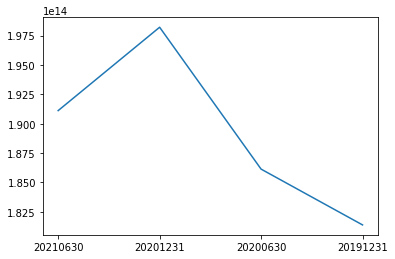

In [74]:
plt.plot(input_df.iloc[0,1:])
plt.show()